In [1]:
from PyEMD import EMD
import pandas as pd
import numpy as np
import progressbar

In [27]:
def create_data_cube(data,input_dim=24, output_dim = 12, timesteps=720):
    m = len(data)
    
    A = np.empty((m,input_dim))
    B = np.empty((m, output_dim))
    
    try:
        for i in range(m):
            window = data[i+input_dim:i:-1]
            A[i,:] = window
            B[i,:] = data[i+input_dim:i+input_dim+output_dim]
    except:
        A = A[:i,:]
    X = np.empty((i-timesteps, timesteps, input_dim))
    y = np.empty((i-timesteps, output_dim))
    for j in range(timesteps):
        X[:,j,:] = A[j:i-(timesteps-j),:]
        
    for a in range(i-(timesteps)):
        y[a,:] = B[a+timesteps,:]
    A = None
    B = None
    return X,y

In [36]:
timesteps=360
emd_dim = 2
data = pd.Series.from_csv("data/canela.csv").values
data = data[:600]

In [37]:
X,y = create_data_cube(data, input_dim=1, output_dim=168, timesteps=timesteps)

In [52]:
X_new = np.empty((X.shape[0], X.shape[1],emd_dim+2))
emd = EMD()
bar = progressbar.ProgressBar(max_value = X.shape[0])
for i in range(X.shape[0]):
    timeseries = X[i,:,0]
    X_new[i,:,0] = X[i,:,0]
    X_new[i,:,1:] = emd.emd(timeseries,max_imf = emd_dim).T
    bar.update(i)

 98% (71 of 72) |######################## | Elapsed Time: 0:00:11 ETA:  0:00:00

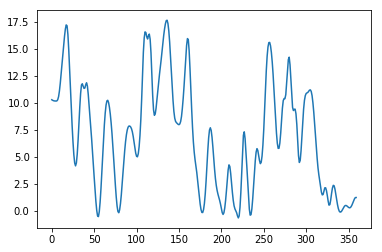

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X_new[0,:,3])

In [99]:
np.save("X_canela_{}_imfs_{}_timesteps".format(emd_dims,timesteps),X_new)
np.save("y_canela_{}_imfs_{}_timesteps".format(emd_dims,timesteps),y)

In [114]:
import os

In [ ]:
os.makedirs("test",exist_ok=)